# SVM for classification

Load IRIS dataset, check its contents:


In [1]:
from sklearn.datasets import load_iris
iris=load_iris()
iris.feature_names
print(iris.feature_names)
print(iris.data[0:5,:])
print(iris.target[0:5])
#print(iris.data)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


Split data into training and testing parts:

In [2]:
from sklearn.model_selection import train_test_split
X=iris.data
y=iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Use a Support Vector Machine for classification:


In [3]:
from sklearn.svm import SVC
SVMmodel=SVC(kernel='linear')
SVMmodel.fit(X_train,y_train)
SVMmodel.get_params()
SVMmodel.score(X_test,y_test)

0.9666666666666667

Let's explore more now. 

*   Choose only first two features (columns) of iris.data
*   SVM is in its basic form a 2-class classifier, so eliminate iris.target =2 from the data



In [4]:
import numpy as np

#choose columns
iris_two_first = iris.data[:,:2]

#filter target
iris_target = iris.target
mask = iris_target !=2
iris_two_first=iris_two_first[mask]
iris_target=iris_target[mask]

print(iris_two_first)
print(iris_target)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

Plot scatterplots of targets 0 and 1 and check the separability of the classes:

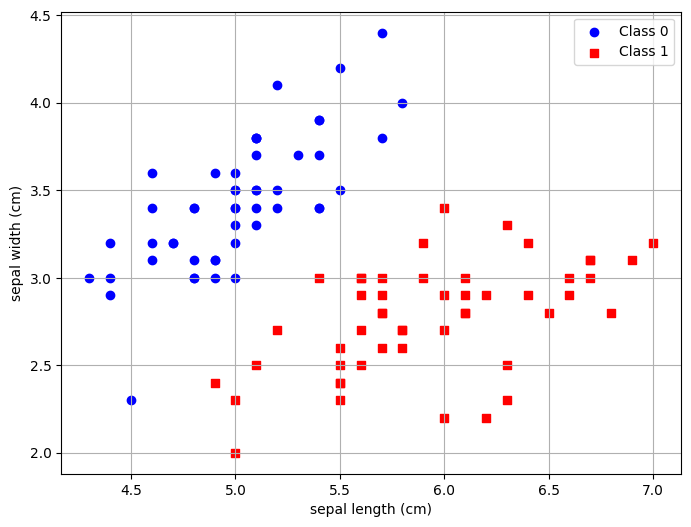

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for label, color, marker in zip([0, 1], ['blue', 'red'], ['o', 's']):
    plt.scatter(
        iris_two_first[iris_target == label, 0],
        iris_two_first[iris_target == label, 1],
        color=color,
        label=f'Class {label}',
        marker=marker
    )

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.grid(True)


Train and test the SVM classifier, play with regularization parameter C (either use the default value or try e.g. 200)

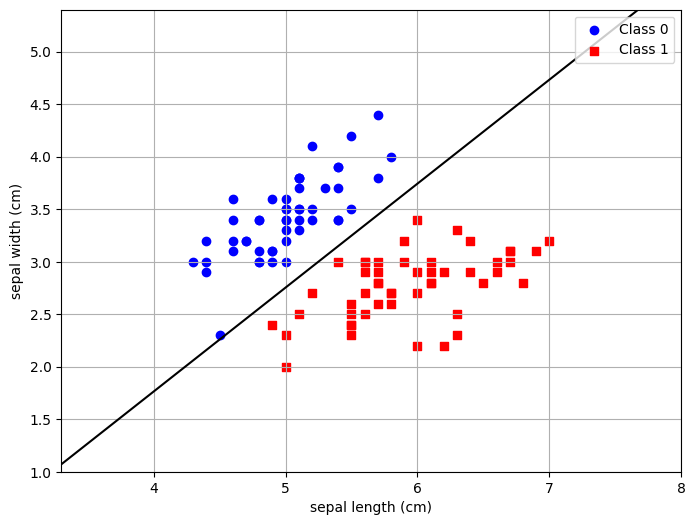

In [6]:
SVMmodel = SVC(kernel='linear')
SVMmodel.fit(iris_two_first, iris_target)

x_min, x_max = iris_two_first[:, 0].min() - 1, iris_two_first[:, 0].max() + 1
y_min, y_max = iris_two_first[:, 1].min() - 1, iris_two_first[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = SVMmodel.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(8, 6))

plt.contour(xx, yy, Z, levels=[0], colors='black', linestyles='solid')

for label, color, marker in zip([0, 1], ['blue', 'red'], ['o', 's']):
    plt.scatter(
        iris_two_first[iris_target == label, 0],
        iris_two_first[iris_target == label, 1],
        color=color,
        label=f'Class {label}',
        marker=marker
    )

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.grid(True)
plt.show()

Show support vectors in the 2D plot, plot the decision line from equation [w0 w1]*[x0 x1] + b = 0:

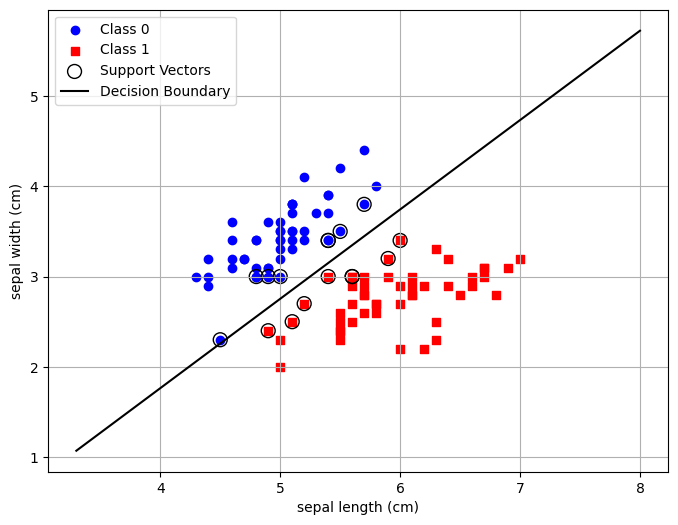

In [7]:
supvectors = SVMmodel.support_vectors_

# Plot the support vectors here
plt.figure(figsize=(8, 6))

for label, color, marker in zip([0, 1], ['blue', 'red'], ['o', 's']):
    plt.scatter(
        iris_two_first[iris_target == label, 0],
        iris_two_first[iris_target == label, 1],
        color=color,
        label=f'Class {label}',
        marker=marker
    )

plt.scatter(supvectors[:, 0], supvectors[:, 1],
            facecolors='none', edgecolors='black', s=100, label="Support Vectors")

# Separating line coefficients:
W = SVMmodel.coef_
b = SVMmodel.intercept_

x_min, x_max = iris_two_first[:, 0].min() - 1, iris_two_first[:, 0].max() + 1
x_values = np.linspace(x_min, x_max, 100)
y_values = -(W[0, 0] * x_values + b) / W[0, 1]

plt.plot(x_values, y_values, 'k-', label="Decision Boundary")

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend()
plt.grid(True)
plt.show()


# Anomaly detection via SVM

Import one-class SVM and generate data (Gaussian blobs in 2D-plane):

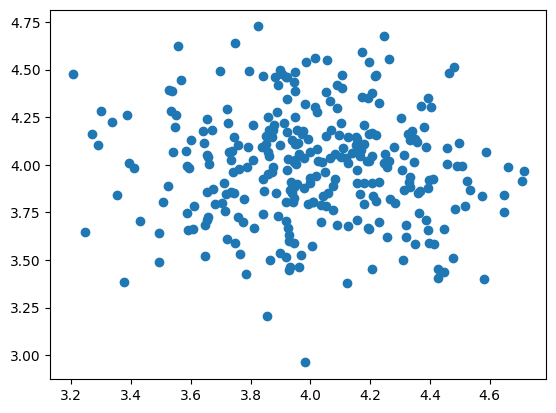

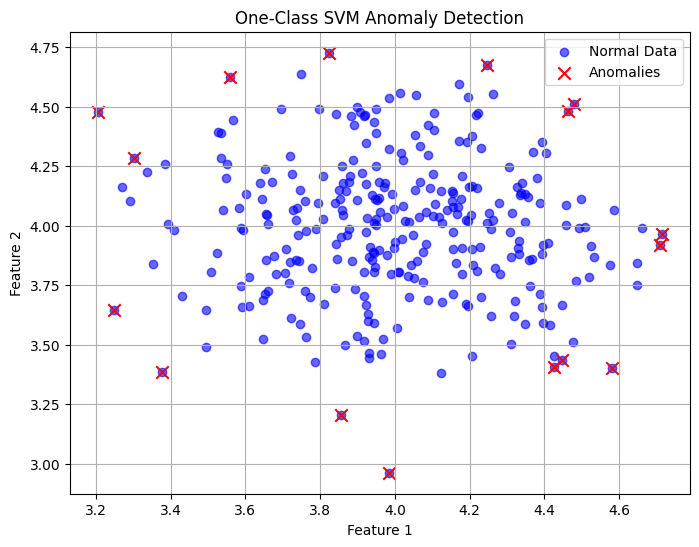

In [9]:
from sklearn.svm import OneClassSVM
from sklearn.datasets import make_blobs
from numpy import quantile, where, random

random.seed(11)
x, _ = make_blobs(n_samples=300, centers=1, cluster_std=.3, center_box=(4, 4))

plt.scatter(x[:,0], x[:,1])
plt.show()

ocsvm = OneClassSVM(kernel='rbf', gamma=0.1, nu=0.05)
ocsvm.fit(x)

y_pred = ocsvm.predict(x)
anomaly_index = where(y_pred == -1)
anomalies = x[anomaly_index]

plt.figure(figsize=(8, 6))
plt.scatter(x[:, 0], x[:, 1], label="Normal Data", color='blue', alpha=0.6)
plt.scatter(anomalies[:, 0], anomalies[:, 1], label="Anomalies", color='red', marker='x', s=80)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("One-Class SVM Anomaly Detection")
plt.legend()
plt.grid(True)
plt.show()

Train one-class SVM and plot the outliers (outputs of prediction being equal to -1)

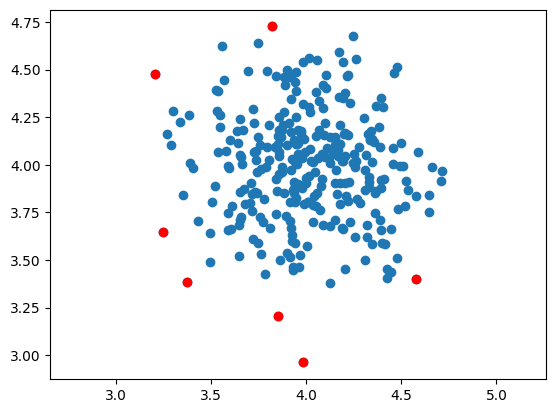

In [13]:
SVMmodelOne = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.03)


SVMmodelOne.fit(x)
pred = SVMmodelOne.predict(x)
anom_index = where(pred==-1)
values = x[anom_index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()



Plot the support vectors:

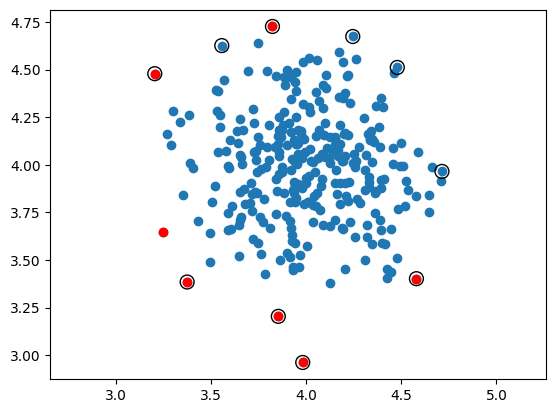

In [14]:
plt.scatter(x[:, 0], x[:, 1])
plt.scatter(values[:, 0], values[:, 1], color='red')
plt.scatter(SVMmodelOne.support_vectors_[:, 0], SVMmodelOne.support_vectors_[:, 1],
            edgecolors='black', facecolors='none', s=100)
plt.axis('equal')
plt.show()

What if we want to have a control what is outlier? Use e.g. 5% "quantile" to mark the outliers. Every point with lower score than threshold will be an outlier.

8.989098620408397


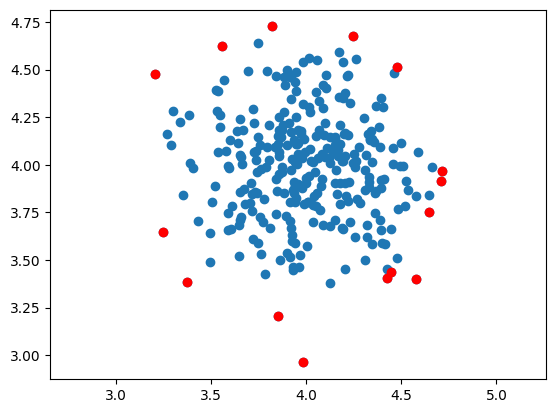

In [16]:
scores = SVMmodelOne.score_samples(x)

thresh = quantile(scores, 0.05)
print(thresh)
index = where(scores<=thresh)
values = x[index]

plt.scatter(x[:,0], x[:,1])
plt.scatter(values[:,0], values[:,1], color='red')
plt.axis('equal')
plt.show()